In [1]:
import sys
sys.path.append('../') # This line is need to import pynncml
import torch
import pynncml as pnc
import numpy as np
from matplotlib import pyplot as plt

In [2]:
xy_min = [0.57e6, 1.32e6]
xy_max = [0.5875e6, 1.335e6]
time_slice=slice("2015-06-01", "2015-06-10")
link_set=pnc.datasets.load_open_mrg(xy_min=xy_min, xy_max=xy_max, time_slice=time_slice)

File already exists at desired location ./data/OpenMRG.zip
Not downloading!


100%|████████████████████████████████████████████████████████████████████████████████| 728/728 [00:50<00:00, 14.48it/s]


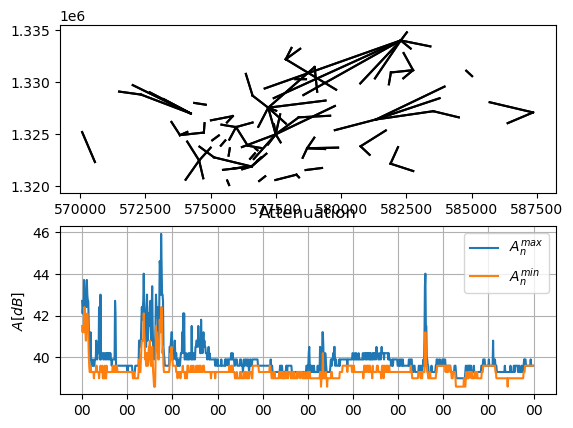

In [3]:
plt.subplot(2,1,1)
link_set.plot_links()
plt.subplot(2,1,2)
link = link_set.get_link(0)
link.plot()

In [4]:
model = pnc.scm.rain_estimation.one_step_dynamic_baseline(pnc.scm.power_law.PowerLawType.MAX, 0.3, 6,
                                                                  quantization_delta=1.0)
imc = pnc.mcm.InferMultipleCMLs(model)
res=imc(link_set)
idw = pnc.mcm.InverseDistanceWeighting(32, 32)
rain_map=idw(res,link_set).numpy()

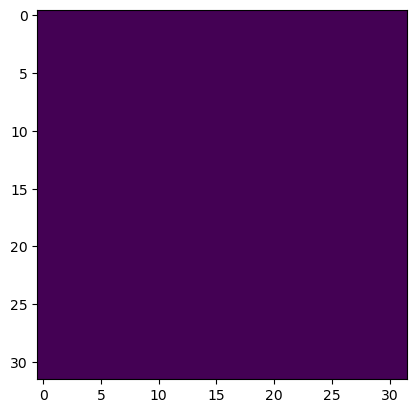

In [19]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


ims = []
for i in range(rain_map.shape[0]):
    # x += np.pi / 15
    # y += np.pi / 30
    im = ax.imshow(rain_map[i,:,:], animated=True)
    if i == 0:
        ax.imshow(rain_map[i,:,:])  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig,ims, interval=50, blit=True,
                                repeat_delay=1000)
plt.show()

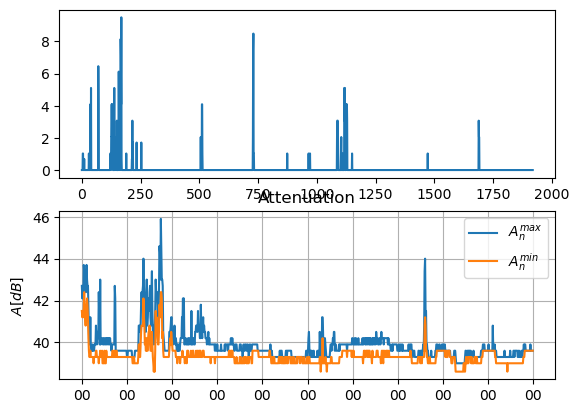

In [6]:
plt.subplot(2,1,1)
plt.plot(res[1,:].numpy())
plt.subplot(2,1,2)
link = link_set.get_link(0)
link.plot()
plt.show()